# **Notebook 3.1 -- Shallow neural networks I**

The purpose of this notebook is to gain some familiarity with shallow neural networks with 1D inputs.  It works through an example similar to figure 3.3 and experiments with different activation functions. <br>

Work through the cells below, running each cell in turn. In various places you will see the words "TO DO". Follow the instructions at these places and write code to complete the functions. There are also questions interspersed in the text.

Contact me at udlbookmail@gmail.com if you find any mistakes or have any suggestions.

In [1]:
# Imports math library
import numpy as np
# Imports plotting library
import matplotlib.pyplot as plt

Let's first construct the shallow neural network with one input, three hidden units, and one output described in section 3.1 of the book.

In [2]:
# Define the Rectified Linear Unit (ReLU) function
def ReLU(preactivation):
  # TODO write code to implement the ReLU and compute the activation at the
  # hidden unit from the preactivation
  # This should work on every element of the ndarray "preactivation" at once
  # One way to do this is with the ndarray "clip" function
  # https://numpy.org/doc/stable/reference/generated/numpy.ndarray.clip.html
  activation = np.clip(preactivation, a_min=0, a_max=None)

  return activation

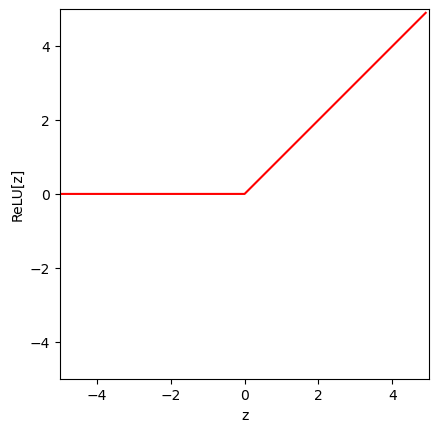

In [3]:
# Make an array of inputs
z = np.arange(-5,5,0.1)
RelU_z = ReLU(z)

# Plot the ReLU function
fig, ax = plt.subplots()
ax.plot(z,RelU_z,'r-')
ax.set_xlim([-5,5]);ax.set_ylim([-5,5])
ax.set_xlabel('z'); ax.set_ylabel('ReLU[z]')
ax.set_aspect('equal')
plt.show()

In [4]:
# Define a shallow neural network with, one input, one output, and three hidden units
def shallow_1_1_3(x, activation_fn, phi_0,phi_1,phi_2,phi_3, theta_10, theta_11, theta_20, theta_21, theta_30, theta_31):
  # TODO Replace the code below to compute the three initial lines
  # from the theta parameters (i.e. implement equations at bottom of figure 3.3a-c).  These are the preactivations
  #Compute the preactivations for each hidden unit (Equations from Figure 3.3a-c)
  pre_1 = theta_10 + theta_11 * x  # preactivation for hidden unit 1
  pre_2 = theta_20 + theta_21 * x  # preactivation for hidden unit 2
  pre_3 = theta_30 + theta_31 * x  # preactivation for hidden unit 3

  # Pass these through the ReLU function to compute the activations as in Figure 3.3d-f
  act_1 = activation_fn(pre_1)
  act_2 = activation_fn(pre_2)
  act_3 = activation_fn(pre_3)

  # Weight the activations using phi1, phi2, and phi3 (Equations from Figure 3.3g-i)
  w_act_1 = phi_1 * act_1
  w_act_2 = phi_2 * act_2
  w_act_3 = phi_3 * act_3

  # Combine the weighted activations and add phi_0 to create the output as in Figure 3.3j
  y = phi_0 + w_act_1 + w_act_2 + w_act_3

  # Return everything we have calculated
  return y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3

In [5]:
# Plot the shallow neural network.  We'll assume input in is range [0,1] and output [-1,1]
# If the plot_all flag is set to true, then we'll plot all the intermediate stages as in Figure 3.3
def plot_neural(x, y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3, plot_all=False, x_data=None, y_data=None):

  # Plot intermediate plots if flag set
  if plot_all:
    fig, ax = plt.subplots(3,3)
    fig.set_size_inches(8.5, 8.5)
    fig.tight_layout(pad=3.0)
    ax[0,0].plot(x,pre_1,'r-'); ax[0,0].set_ylabel('Preactivation')
    ax[0,1].plot(x,pre_2,'b-'); ax[0,1].set_ylabel('Preactivation')
    ax[0,2].plot(x,pre_3,'g-'); ax[0,2].set_ylabel('Preactivation')
    ax[1,0].plot(x,act_1,'r-'); ax[1,0].set_ylabel('Activation')
    ax[1,1].plot(x,act_2,'b-'); ax[1,1].set_ylabel('Activation')
    ax[1,2].plot(x,act_3,'g-'); ax[1,2].set_ylabel('Activation')
    ax[2,0].plot(x,w_act_1,'r-'); ax[2,0].set_ylabel('Weighted Act')
    ax[2,1].plot(x,w_act_2,'b-'); ax[2,1].set_ylabel('Weighted Act')
    ax[2,2].plot(x,w_act_3,'g-'); ax[2,2].set_ylabel('Weighted Act')

    for plot_y in range(3):
      for plot_x in range(3):
        ax[plot_y,plot_x].set_xlim([0,1]);ax[plot_x,plot_y].set_ylim([-1,1])
        ax[plot_y,plot_x].set_aspect(0.5)
      ax[2,plot_y].set_xlabel('Input, $x$');
    plt.show()

  fig, ax = plt.subplots()
  ax.plot(x,y)
  ax.set_xlabel('Input, $x$'); ax.set_ylabel('Output, $y$')
  ax.set_xlim([0,1]);ax.set_ylim([-1,1])
  ax.set_aspect(0.5)
  if x_data is not None:
    ax.plot(x_data, y_data, 'mo')
    for i in range(len(x_data)):
      ax.plot(x_data[i], y_data[i],)
  plt.show()

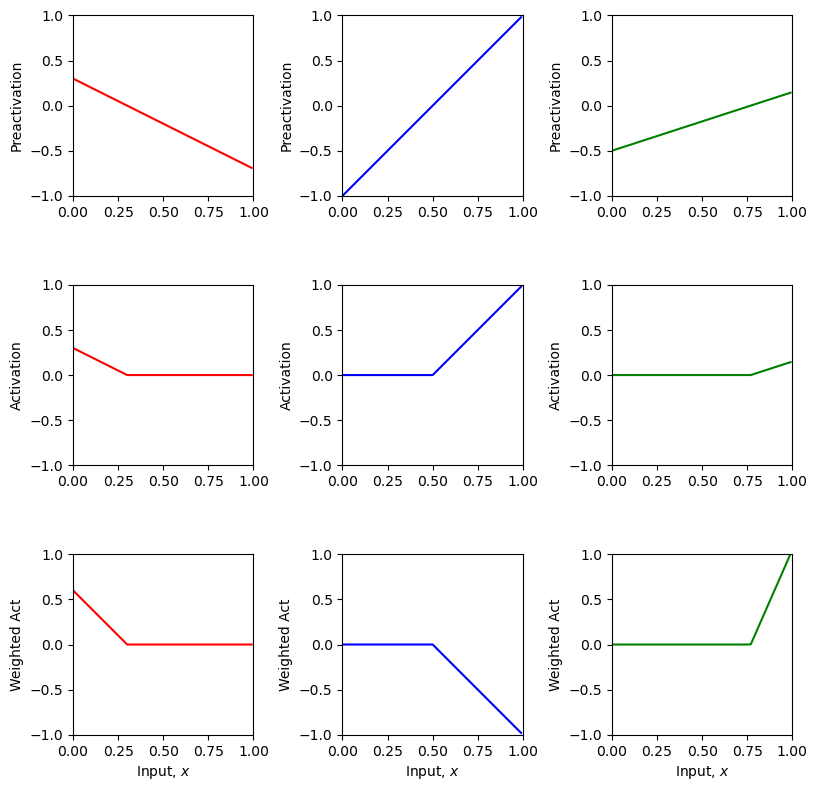

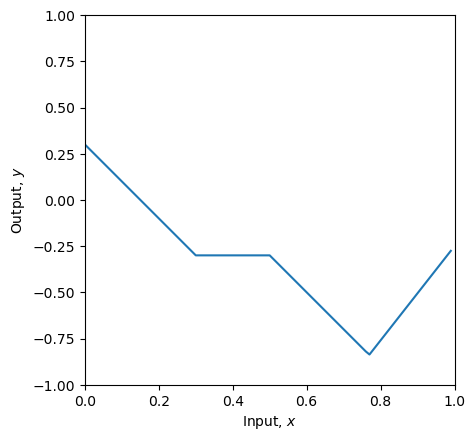

In [6]:
# Now lets define some parameters and run the neural network
theta_10 =  0.3 ; theta_11 = -1.0
theta_20 = -1.0  ; theta_21 = 2.0
theta_30 = -0.5  ; theta_31 = 0.65
phi_0 = -0.3; phi_1 = 2.0; phi_2 = -1.0; phi_3 = 7.0

# Define a range of input values
x = np.arange(0,1,0.01)

# We run the neural network for each of these input values
y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3 = \
    shallow_1_1_3(x, ReLU, phi_0,phi_1,phi_2,phi_3, theta_10, theta_11, theta_20, theta_21, theta_30, theta_31)
# And then plot it
plot_neural(x, y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3, plot_all=True)

If your code is correct, then the final output should look like this:


Now let's play with the parameters to make sure we understand how they work.  The original  parameters were:

$\theta_{10} =  0.3$ ; $\theta_{11} = -1.0$<br>
$\theta_{20} =  -1.0$ ; $\theta_{21} = 2.0$<br>
$\theta_{30} =  -0.5$ ; $\theta_{31} = 0.65$<br>
$\phi_0 = -0.3; \phi_1 = 2.0; \phi_2 = -1.0; \phi_3 = 7.0$

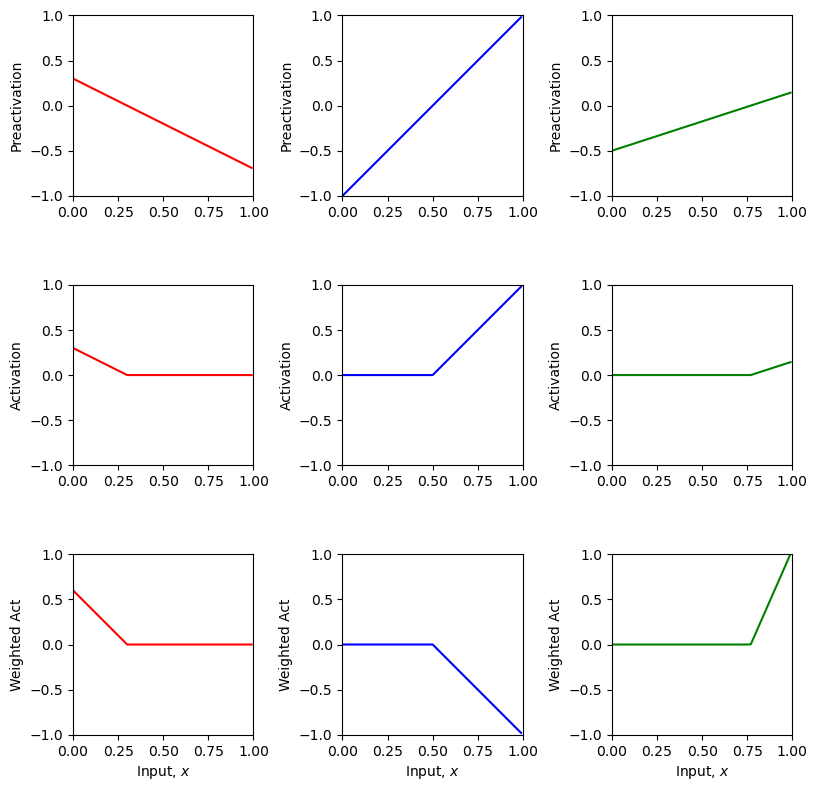

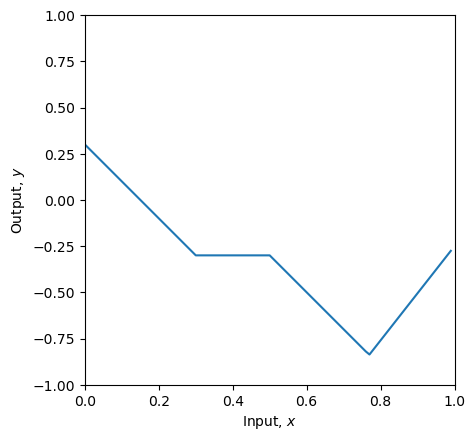

In [7]:
# TODO
# 1. Predict what effect changing phi_0 will have on the network.
# Answer: Changing phi_0 will shift the output 'y' up or down.

# 2. Predict what effect multiplying phi_1, phi_2, phi_3 by 0.5 would have.  Check if you are correct
# Answer: It will reduce the influence of the activations by half, flattening the output 'y'.

# 3. Predict what effect multiplying phi_1 by -1 will have.  Check if you are correct.
# Answer: It will invert the contribution of the first hidden unit, flipping its effect on the output.

# 4. Predict what effect setting theta_20 to -1.2 will have.  Check if you are correct.
# Answer: It will shift the activation of the second hidden unit.

# 5. Change the parameters so that there are only two "joints" (including outside the range of the plot)
# There are actually three ways to do this. See if you can figure them all out
# Answer: Set theta_20 and theta_21 to values that deactivate the second unit, somthing like: theta_20, theta_21 = -10, 0


# 6. With the original parameters, the second line segment is flat (i.e. has slope zero)
# How could you change theta_10 so that all of the segments have non-zero slopes
# Answer: Change theta_10 to adjust the first hidden unit activation. theta_10 = 0.8

# 7. What do you predict would happen if you multiply theta_20 and theta21 by 0.5, and phi_2 by 2.0?
# Check if you are correct.

# 8. What do you predict would happen if you multiply theta_20 and theta21 by -0.5, and phi_2 by -2.0?
# Check if you are correct.

theta_10 =  0.3 ; theta_11 = -1.0
theta_20 = -1.0  ; theta_21 = 2.0
theta_30 = -0.5  ; theta_31 = 0.65
phi_0 = -0.3; phi_1 = 2.0; phi_2 = -1.0; phi_3 = 7.0

# Define a range of input values
x = np.arange(0,1,0.01)

# We run the neural network for each of these input values
y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3 = \
    shallow_1_1_3(x, ReLU, phi_0,phi_1,phi_2,phi_3, theta_10, theta_11, theta_20, theta_21, theta_30, theta_31)
# And then plot it
plot_neural(x, y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3, plot_all=True)

# Least squares loss

Now let's consider fitting the network to data.  First we need to define the loss function.  We'll use the least squares loss:

\begin{equation}
L[\boldsymbol\phi] = \sum_{i=1}^{I}(y_{i}-\text{f}[x_{i},\boldsymbol\phi])^2
\end{equation}

where $(x_i,y_i)$ is an input/output training pair and $\text{f}[\bullet,\boldsymbol\phi]$ is the neural network with parameters $\boldsymbol\phi$.  The first term in the brackets is the ground truth output and the second term is the prediction of the model

In [8]:
# Least squares function
def least_squares_loss(y_true, y_pred):
    return np.sum((y_true - y_pred) ** 2)

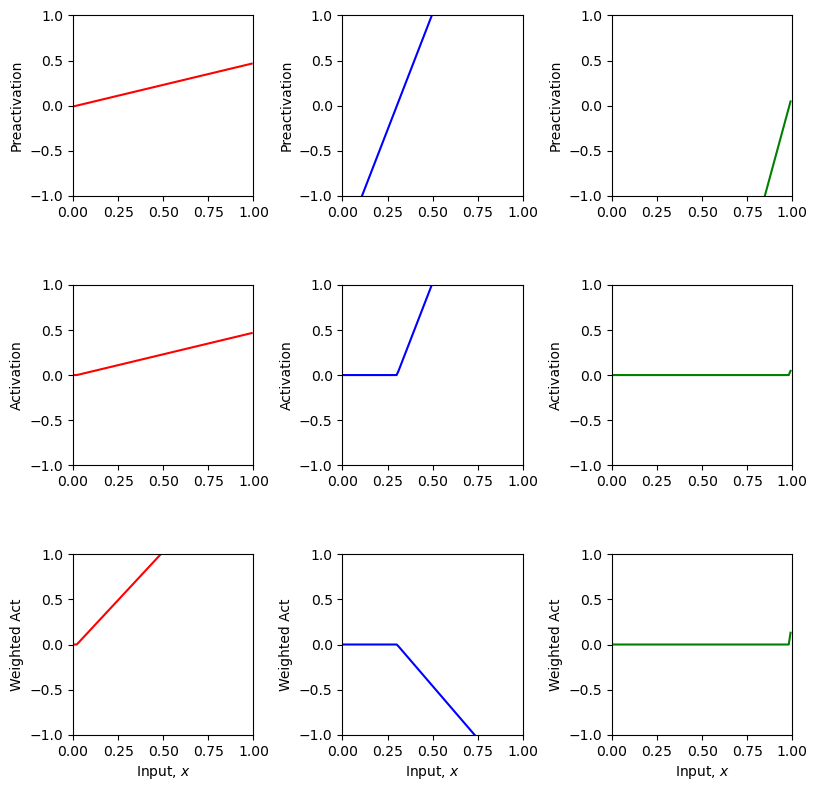

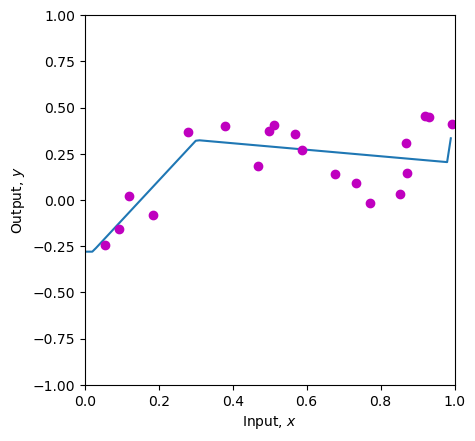

Your Loss after optimization = 0.360


In [9]:
# Now lets define some parameters, run the neural network, and compute the loss
theta_10 =  0.3 ; theta_11 = -1.0
theta_20 = -1.0  ; theta_21 = 2.0
theta_30 = -0.5  ; theta_31 = 0.65
phi_0 = -0.3; phi_1 = 2.0; phi_2 = -1.0; phi_3 = 7.0

# Function to adjust parameters to fit the model
def fit_model(x_train, y_train, params, learning_rate, target_loss, max_iterations=1000):
    phi_0, phi_1, phi_2, phi_3 = params[:4]
    theta_10, theta_11, theta_20, theta_21, theta_30, theta_31 = params[4:]
    
    # Perform iterative adjustment
    for _ in range(max_iterations):
        # Compute loss for current parameters
        y_predict, *_ = shallow_1_1_3(x_train, ReLU, phi_0, phi_1, phi_2, phi_3, theta_10, theta_11, theta_20, theta_21, theta_30, theta_31)
        loss = least_squares_loss(y_train, y_predict)

        # Check convergence
        if loss <= target_loss:
            break

        # Adjust each parameter to minimize loss
        for i, param in enumerate([phi_0, phi_1, phi_2, phi_3, theta_10, theta_11, theta_20, theta_21, theta_30, theta_31]):
            current_loss = loss

            # Try increasing the parameter
            new_params = params.copy()
            new_params[i] += learning_rate
            y_predict, *_ = shallow_1_1_3(x_train, ReLU, *new_params[:4], *new_params[4:])
            new_loss_increase = least_squares_loss(y_train, y_predict)

            # Try decreasing the parameter
            new_params[i] -= 2 * learning_rate
            y_predict, *_ = shallow_1_1_3(x_train, ReLU, *new_params[:4], *new_params[4:])
            new_loss_decrease = least_squares_loss(y_train, y_predict)

            # Choose the direction that reduces the loss more
            if new_loss_increase < current_loss:
                params[i] += learning_rate
                current_loss = new_loss_increase
            elif new_loss_decrease < current_loss:
                params[i] -= learning_rate
                current_loss = new_loss_decrease

            # Update parameter values
            phi_0, phi_1, phi_2, phi_3 = params[:4]
            theta_10, theta_11, theta_20, theta_21, theta_30, theta_31 = params[4:]

    return params

# Initial parameters
params = [phi_0, phi_1, phi_2, phi_3, theta_10, theta_11, theta_20, theta_21, theta_30, theta_31]
learning_rate = 0.01  # Learning rate for adjustments
target_loss = 0.181  # Target loss to achieve

# Data provided
x_train = np.array([0.09291784,0.46809093,0.93089486,0.67612654,0.73441752,0.86847339,\
                   0.49873225,0.51083168,0.18343972,0.99380898,0.27840809,0.38028817,\
                   0.12055708,0.56715537,0.92005746,0.77072270,0.85278176,0.05315950,\
                   0.87168699,0.58858043])
y_train = np.array([-0.15934537,0.18195445,0.451270150,0.13921448,0.09366691,0.30567674,\
                    0.372291170,0.40716968,-0.08131792,0.41187806,0.36943738,0.3994327,\
                    0.019062570,0.35820410,0.452564960,-0.0183121,0.02957665,-0.24354444, \
                    0.148038840,0.26824970])

# Fit model
params_optimized = fit_model(x_train, y_train, params, learning_rate, target_loss)

# Run and plot the neural network with optimized parameters
y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3 = \
    shallow_1_1_3(x, ReLU, *params_optimized[:4], *params_optimized[4:])
plot_neural(x, y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3, plot_all=True, x_data=x_train, y_data=y_train)

# Compute loss with optimized parameters
y_predict, *_ = shallow_1_1_3(x_train, ReLU, *params_optimized[:4], *params_optimized[4:])
loss = least_squares_loss(y_train, y_predict)
print('Your Loss after optimization = %3.3f' % loss)
